<a href="https://colab.research.google.com/github/AshilPrasad/Machine-learning/blob/main/2_Iris_flower__KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.isna().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#droping coloum
df1=df.drop(["Id"],axis=1)
print(df1)



     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
x=df1.iloc[:,:-1]
print(x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [ ]:
y=df1.iloc[:,-1]
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [ ]:
#split training and tesing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [ ]:
y_train

81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 105, dtype: object

In [ ]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
146     Iris-virginica
51     Iris-versicolor
27         Iris-setosa
4          Iris-setosa
32         Iris-setosa
142     Iris-virginica
85     Iris-versicolor
86     Iris-versicolor
16         

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[-0.4134164 , -1.46440146, -0.10014569, -0.32149987],
       [ 0.55122187, -0.49582097,  0.71771076,  0.35364985],
       [ 0.67180165,  0.2306144 ,  0.95138404,  0.75873969],
       [ 0.91296121, -0.01153072,  0.30878254,  0.21861991],
       [ 1.63643991,  1.44134002,  1.30189395,  1.7039493 ],
       [-0.17225683, -0.25367584,  0.1919459 ,  0.08358997],
       [ 2.11875905, -0.01153072,  1.59398554,  1.16382952],
       [-0.29283662, -0.01153072,  0.36720086,  0.35364985],
       [-0.89573553,  1.19919489, -1.443767  , -1.40173942],
       [ 2.23933883, -0.49582097,  1.65240385,  1.02879957],
       [-0.05167705, -0.73796609,  0.13352758, -0.32149987],
       [-0.77515575,  0.95704977, -1.443767  , -1.40173942],
       [-1.01631531,  1.19919489, -1.50218532, -1.26670948],
       [-0.89573553,  1.92563026, -1.15167541, -1.13167953],
       [-1.01631531, -2.43298195, -0.21698232, -0.32149987],
       [ 0.55122187, -0.73796609,  0.60087413,  0.75873969],
       [-1.25747488,  0.

In [ ]:
x_test

array([[ 0.3132457 , -0.81335423,  0.65591001,  0.11697576],
       [-0.17705192,  1.3915217 , -0.97781419, -1.01100479],
       [ 2.27443615, -1.25432942,  1.85397443,  1.49561866],
       [ 0.19067129, -0.59286664,  0.54699507,  0.49296928],
       [ 1.17126652, -0.81335423,  0.71036749,  0.36763811],
       [-0.54477513,  0.50957133, -1.08672914, -0.88567362],
       [-0.29962632, -0.59286664,  0.05687781,  0.24230693],
       [ 1.29384092, -0.15189145,  0.87373991,  1.49561866],
       [ 0.4358201 , -2.13627979,  0.54699507,  0.49296928],
       [-0.05447751, -1.03384183,  0.22025023,  0.11697576],
       [ 0.80354331,  0.06859614,  0.87373991,  1.11962514],
       [-1.28022155, -0.37237905, -1.14118661, -1.26166714],
       [-0.42220072,  0.73005892, -1.19564409, -1.13633596],
       [-1.15764714, -0.15189145, -1.08672914, -1.26166714],
       [-0.91249834,  1.3915217 , -1.08672914, -1.01100479],
       [ 0.5583945 ,  0.28908373,  0.65591001,  0.61830045],
       [ 0.80354331, -0.

In [ ]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
print(model.predict([[6.1,5.2,4.8,0.3]]))

['Iris-virginica']


In [ ]:
pred=model.predict(scaler.transform([[6.1,5.2,4.8,0.3]]))
print(pred)

['Iris-setosa']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


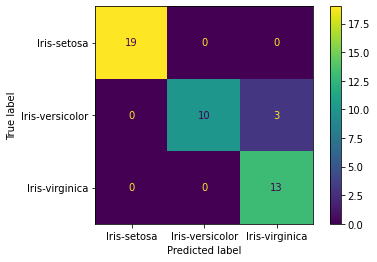

In [ ]:
#performence evaluation
from sklearn.metrics import  confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
result=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
labels=["Iris-setosa","Iris-versicolor","Iris-virginica"]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
score

0.9333333333333333

In [ ]:
result

array([[19,  0,  0],
       [ 0, 10,  3],
       [ 0,  0, 13]])

In [ ]:
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.81      1.00      0.90        13

       accuracy                           0.93        45
      macro avg       0.94      0.92      0.92        45
   weighted avg       0.95      0.93      0.93        45

